In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data=pd.read_csv("daily_and_month_call_report.csv")
data.head(5)

,Year,Month,Total Number of Calls,Total Number of Doctors Consultancy,Number of Total Health Information,Number of Total Ambulance Information,Number of Total Complaints,Number of Calls To Know About The Service
0,2025,Feb,155200,98964,3777,5773,3706,42980
1,2025,Jan,130982,87815,3217,4179,3178,32593
2,2024,Dec,133725,86832,3634,3735,3035,36489
3,2024,Nov,153698,93710,3010,4421,4133,48424
4,2024,Oct,214604,108207,6307,5792,8885,80804


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Year                                       107 non-null    int64 
 1   Month                                      107 non-null    object
 2   Total Number of Calls                      107 non-null    int64 
 3   Total Number of Doctors Consultancy        107 non-null    int64 
 4   Number of Total Health Information         107 non-null    int64 
 5   Number of Total Ambulance Information      107 non-null    int64 
 6   Number of Total Complaints                 107 non-null    int64 
 7   Number of Calls To Know About The Service  107 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 6.8+ KB


In [4]:
data["Month"]=data["Month"].replace({"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"June":6,"July":7,"Aug":8,"Sept":9,"Oct":10,"Nov":11,"Dec":12})

In [5]:
data.describe()

,Year,Month,Total Number of Calls,Total Number of Doctors Consultancy,Number of Total Health Information,Number of Total Ambulance Information,Number of Total Complaints,Number of Calls To Know About The Service
count,107.000000,107.000000,1.070000e+02,1.070000e+02,107.000000,107.000000,107.000000,107.000000
mean,2020.205607,6.532710,2.340316e+05,1.544553e+05,15714.728972,9240.317757,6924.457944,47509.102804
std,2.601662,3.467688,3.697001e+05,2.681351e+05,23104.165341,15330.680874,10484.201602,61227.797516
min,2016.000000,1.000000,5.143200e+04,3.816200e+04,3010.000000,220.000000,77.000000,4075.000000
25%,2018.000000,4.000000,9.918850e+04,6.081800e+04,6858.000000,836.000000,697.000000,18536.500000
50%,2020.000000,7.000000,1.424000e+05,9.489300e+04,10841.000000,4734.000000,4133.000000,28895.000000
75%,2022.000000,9.500000,2.025520e+05,1.215265e+05,13291.000000,8658.500000,8262.000000,45822.500000
max,2025.000000,12.000000,2.329457e+06,1.703100e+06,173306.000000,91751.000000,59760.000000,342434.000000


In [6]:
data.corr()

,Year,Month,Total Number of Calls,Total Number of Doctors Consultancy,Number of Total Health Information,Number of Total Ambulance Information,Number of Total Complaints,Number of Calls To Know About The Service
Year,1.000000,-0.109504,0.047188,0.029903,-0.130861,0.163816,0.205878,0.122573
Month,-0.109504,1.000000,-0.058639,-0.073536,-0.015659,-0.029021,-0.043964,-0.013412
Total Number of Calls,0.047188,-0.058639,1.000000,0.994481,0.924721,0.891041,0.871245,0.962238
Total Number of Doctors Consultancy,0.029903,-0.073536,0.994481,1.000000,0.904190,0.848324,0.827180,0.930864
Number of Total Health Information,-0.130861,-0.015659,0.924721,0.904190,1.000000,0.820058,0.836434,0.899339
Number of Total Ambulance Information,0.163816,-0.029021,0.891041,0.848324,0.820058,1.000000,0.933792,0.946049
Number of Total Complaints,0.205878,-0.043964,0.871245,0.827180,0.836434,0.933792,1.000000,0.917892
Number of Calls To Know About The Service,0.122573,-0.013412,0.962238,0.930864,0.899339,0.946049,0.917892,1.000000


In [7]:
ss=StandardScaler()

In [8]:
x=data.drop(["Total Number of Calls"],axis=1)
y=data["Total Number of Calls"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Model

In [9]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Ada Boost Regression": AdaBoostRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Extra Trees Regression": ExtraTreesRegressor(),
    "Bagging Regression": BaggingRegressor(),
    "Support Vector Regression (SVR)": SVR(),
    "K-Nearest Neighbors Regression": KNeighborsRegressor(),
    "Gaussian Process Regression": GaussianProcessRegressor(),
    "MLP (Neural Network) Regression": MLPRegressor()
}

# Define Param Grid

In [10]:
param_grid = {
    "Linear Regression": {}, 
    "Ridge Regression": {"alpha": [0.1, 1.0, 10.0, 100.0]},
    "Lasso Regression": {"alpha": [0.0001, 0.001, 0.01, 0.1, 1]},
    "Elastic Net Regression": {
        "alpha": [0.0001, 0.001, 0.01, 0.1, 1],
        "l1_ratio": [0.1, 0.5, 0.7, 0.9, 1.0],
    },
    "Bayesian Ridge Regression": {"alpha_1": [1e-6, 1e-4, 1e-2, 1], "alpha_2": [1e-6, 1e-4, 1e-2, 1]},
    "Decision Tree Regression": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
    "Random Forest Regression": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
    "Ada Boost Regression": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1],
    },
    "Gradient Boosting Regression": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 10],
    },
    "Extra Trees Regression": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
    "Bagging Regression": {
        "n_estimators": [10, 50, 100],
        "max_samples": [0.5, 0.7, 1.0],
    },
    "Support Vector Regression (SVR)": {
        "C": [0.1, 1, 10, 100],
        "kernel": ["linear", "poly", "rbf"],
        "gamma": ["scale", "auto"],
    },
    "K-Nearest Neighbors Regression": {
        "n_neighbors": [3, 5, 10, 20],
        "weights": ["uniform", "distance"],
        "algorithm": ["ball_tree", "kd_tree", "brute"],
    },
    "Gaussian Process Regression": {
        "alpha": [1e-10, 1e-5, 1e-2, 1e-1],
    },
    "MLP (Neural Network) Regression": {
        "hidden_layer_sizes": [(50,), (100,), (50, 50)],
        "activation": ["relu", "tanh"],
        "solver": ["adam", "sgd"],
        "alpha": [0.0001, 0.001, 0.01],
        "learning_rate": ["constant", "adaptive"],
    },
}

In [11]:
def tune_model(model, params, x_train, y_train):
    grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring="r2", n_jobs=-1)
    grid_search.fit(x_train, y_train)
    return grid_search.best_estimator_

# Model Compile

In [12]:
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    best_models[model_name] = tune_model(model, param_grid[model_name], x_train, y_train)


Tuning Linear Regression...
Tuning Ridge Regression...
Tuning Lasso Regression...
Tuning Elastic Net Regression...
Tuning Bayesian Ridge Regression...
Tuning Decision Tree Regression...
Tuning Random Forest Regression...
Tuning Ada Boost Regression...
Tuning Gradient Boosting Regression...
Tuning Extra Trees Regression...
Tuning Bagging Regression...
Tuning Support Vector Regression (SVR)...
Tuning K-Nearest Neighbors Regression...
Tuning Gaussian Process Regression...
Tuning MLP (Neural Network) Regression...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

In [13]:
model_scores = {}
for model_name, model in best_models.items():
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    model_scores[model_name] = r2  # Store R² Score

    print(f"\n📊 {model_name} Performance:")
    print(f"R² Score: {r2*100:.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.4f}")


📊 Linear Regression Performance:
R² Score: 99.9992
MAE: 443.0233
RMSE: 823.1169

📊 Ridge Regression Performance:
R² Score: 99.9980
MAE: 830.1917
RMSE: 1280.1557

📊 Lasso Regression Performance:
R² Score: 99.9990
MAE: 409.3206
RMSE: 916.0090

📊 Elastic Net Regression Performance:
R² Score: 99.9990
MAE: 409.3206
RMSE: 916.0090

📊 Bayesian Ridge Regression Performance:
R² Score: -0.1010
MAE: 143653.1995
RMSE: 283766.3165

📊 Decision Tree Regression Performance:
R² Score: 58.5986
MAE: 55860.5455
RMSE: 182494.1591

📊 Random Forest Regression Performance:
R² Score: 95.6085
MAE: 21703.7995
RMSE: 59435.4606

📊 Ada Boost Regression Performance:
R² Score: 84.0975
MAE: 46089.7269
RMSE: 113103.0299

📊 Gradient Boosting Regression Performance:
R² Score: 90.2624
MAE: 28648.0414
RMSE: 88505.1091

📊 Extra Trees Regression Performance:
R² Score: 96.4118
MAE: 18040.1462
RMSE: 53725.1312

📊 Bagging Regression Performance:
R² Score: 97.9351
MAE: 18108.0045
RMSE: 40755.6360

📊 Support Vector Regression (S

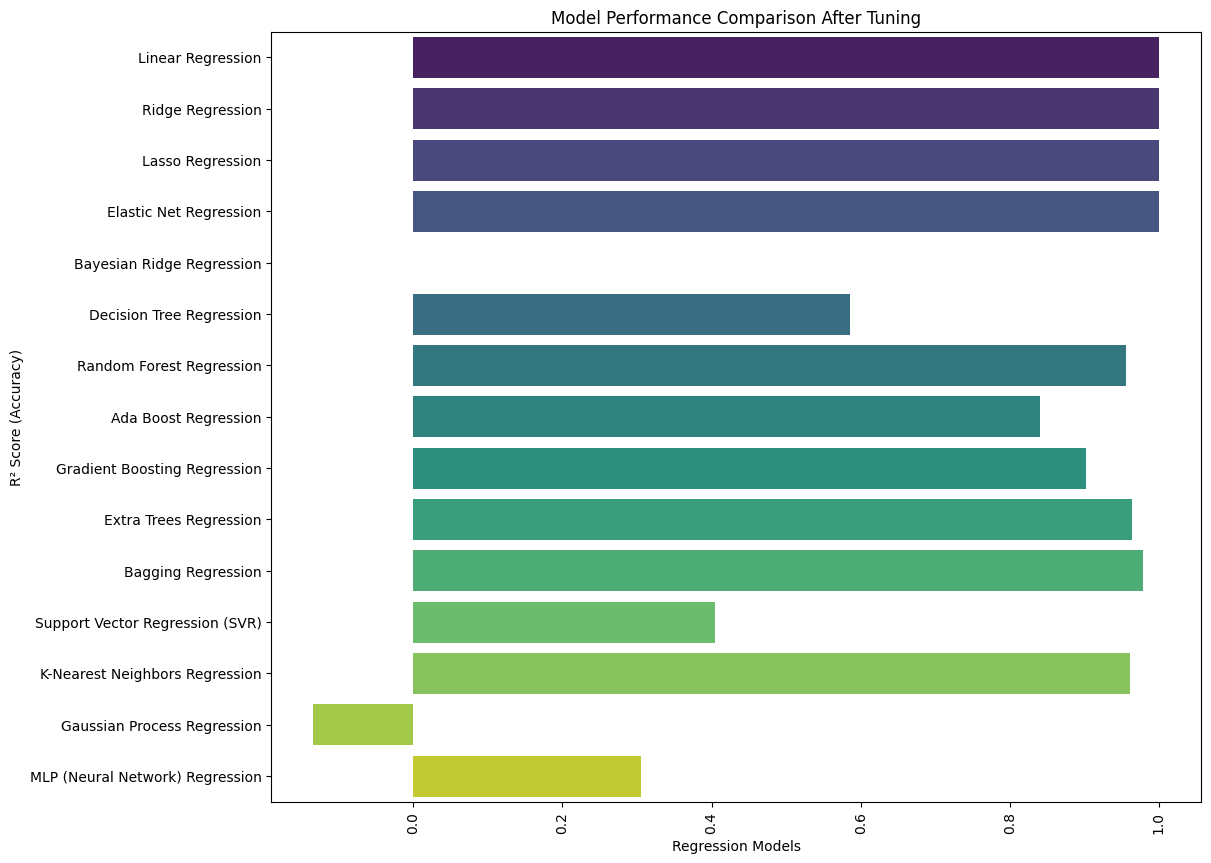

In [19]:
scores_df = pd.DataFrame(list(model_scores.items()), columns=["Model", "R² Score"])
plt.figure(figsize=(12, 10))
sns.barplot(y="Model", x="R² Score", data=scores_df, palette="viridis")
plt.xlabel("Regression Models")
plt.ylabel("R² Score (Accuracy)")
plt.title("Model Performance Comparison After Tuning")
plt.xticks(rotation=90)
plt.show()